In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import requests
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/universities/Final2.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
grad1=pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')
grad2=pd.read_csv('../input/graduate-admissions/Admission_Predict.csv')
grad=grad2.append(grad1) 
grad.drop(['Serial No.'], axis = 1, inplace = True)
grad.rename(columns = {'CGPA':'GPA','Chance of Admit ':'Chance of Admit', 'LOR ':'LOR', 'GRE Score':'GRE', 'TOEFL Score':'TOEFL'}, inplace=True)
grad['GPA']= grad['GPA'].apply(lambda x:round(x,1))

In [3]:
grad.head()

,GRE,TOEFL,University Rating,SOP,LOR,GPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.7,1,0.92
1,324,107,4,4.0,4.5,8.9,1,0.76
2,316,104,3,3.0,3.5,8.0,1,0.72
3,322,110,3,3.5,2.5,8.7,1,0.80
4,314,103,2,2.0,3.0,8.2,0,0.65


In [4]:
grad.describe()

,GRE,TOEFL,University Rating,SOP,LOR,GPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.588444,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600926,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.100000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.600000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.100000,1.000000,0.822500
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.900000,1.000000,0.970000


In [5]:
print(grad.isnull().sum())

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
GPA                  0
Research             0
Chance of Admit      0
dtype: int64


<AxesSubplot:>

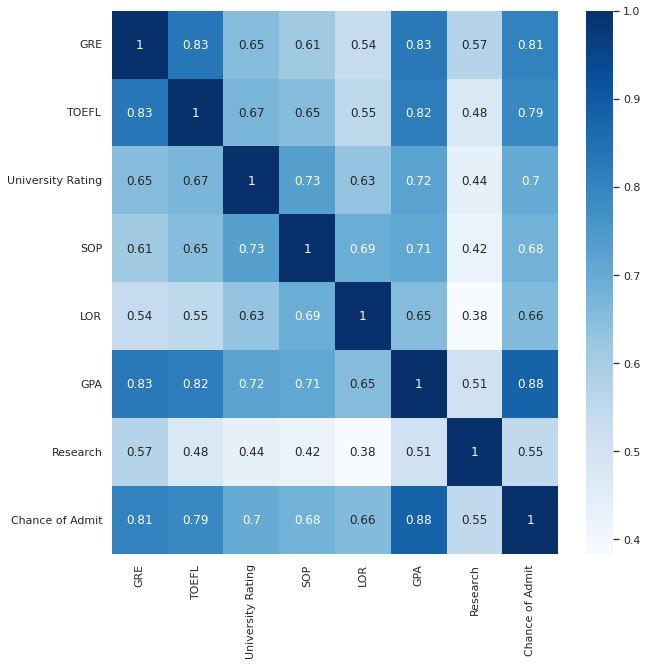

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(grad.corr(), annot=True, cmap='Blues')

Text(0.5, 1.0, 'GPA vs TOEFL')

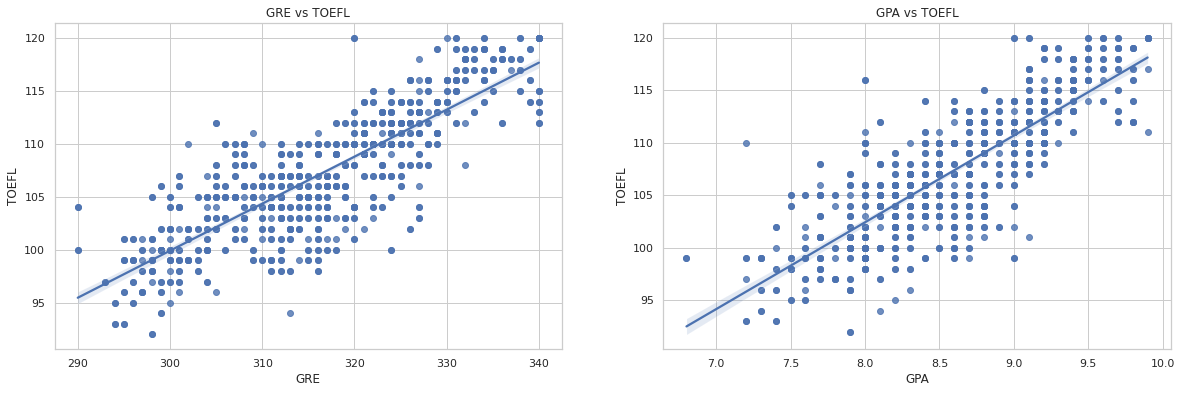

In [7]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(grad['GRE'], grad['TOEFL'])
plt.title('GRE vs TOEFL')

plt.subplot(1,2,2)
sns.regplot(grad['GPA'], grad['TOEFL'])
plt.title('GPA vs TOEFL')

Chance of Admit is strogly related on CGPA, GRE and TOEFL
TOEFL is strogly related on CGPA and GRE  

In [8]:
X=grad[['GPA','GRE']]
X.head()

,GPA,GRE
0,9.7,337
1,8.9,324
2,8.0,316
3,8.7,322
4,8.2,314


In [9]:
Y=grad['TOEFL']
Y.head()

0    118
1    107
2    104
3    110
4    103
Name: TOEFL, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#Normalisation works slightly better for Regression.
X_norm=preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=10)

In [11]:
toefl_pred=LinearRegression()
toefl_pred.fit(X_train,y_train)
predictions = toefl_pred.predict(X_test)
mse=mean_squared_error(y_test, predictions)
mae=mean_absolute_error(y_test, predictions)
r2=r2_score(y_test, predictions)
score=toefl_pred.score(X_test,y_test)
#round_pred=list(map(lambda x:round(x),predictions))
print(mse, mae, r2)

9.10097024730669 2.387192869838648 0.7558952689983975


In [12]:
df=pd.read_csv('../input/universities/Final2.csv')
df.drop(['Unnamed: 6'], axis = 1, inplace = True)
df['GRE']= df['greq']+df['grev']

In [13]:
df['type'].unique()

array(['International', 'International with US Degree', 'American',
       'Other', nan], dtype=object)

In [14]:
univ=df[(df['type']=='International')][['University','GRE','GPA']]

In [15]:
len(univ.University.str.lower().unique())

1034

In [16]:
def gpa_conv(gpa):
    if gpa<=4:
        r3=round(gpa,1)
        return 7+3*(r3-3)
    elif gpa>6:
        return round(gpa,1)
    return 0

In [17]:
univ['GPA']=univ['GPA'].apply(gpa_conv)

In [18]:
univ=univ[univ['GPA']>7]

In [19]:
#tested regex queries for given universities
codes={'UCSD|San Diego':'University of California, San Diego (UCSD)','Berkeley|ucb':'University of California, Berkeley (UCB)'
       ,'ucla':'University of California, Los Angeles (UCLA)','Mich':'University of Michigan-Ann Arbor'
       ,'Houston':'University of Houston','Carnegie |cmu':'Carnegie Mellon University','john':'Johns Hopkins University'
       ,'stanford':'Stanford University','ohio':'Ohio State University ','urbana|uiuc':'University of Illinois at Urbana-Champaign',
 'Wisconsin':'University of Wisconsin-Madison','iowa':'University of Iowa','austin':'University of Texas at Austin',
       'rice':'Rice University','duke':'Duke University','Columbia University':'Columbia University','Colorado':'Colorado state university',
       'Bloomington':'Indiana University','dallas':'UT Dallas','yale':'Yale University','University Of Washington':'University Of Washington'
       ,'University of Pennsylvania':'University of Pennsylvania','Chapel Hill|unc':'University of North Carolina, Chapel Hill','IUPUI':'IUPUI',
       'University of Florida':'University of Florida','Buffalo':'SUNY Buffalo','University Of Chicago':'University of Chicago'
       ,'Princeton':'Princeton University','Northwestern Uni':'Northwestern University','nyu':'New York University (NYU)',
       'Louisiana state':'Louisiana State University','Harvard':'Harvard University','Cornell':'Cornell University','brown':'Brown University'}

In [20]:
#list(univ[univ.University.str.contains('Bloomington', case=False, regex=True)]['University'].unique())
#sum(univ.University=='New York University')

In [21]:
data=pd.DataFrame()
for i in codes:
    frame=univ[univ.University.str.contains(i, case=False, regex=True)]
    frame.University=codes[i]
    data=data.append(frame,ignore_index=True)

In [22]:
data.head()

,University,GRE,GPA
0,"University of California, San Diego (UCSD)",334,8.9
1,"University of California, San Diego (UCSD)",336,8.8
2,"University of California, San Diego (UCSD)",329,9.4
3,"University of California, San Diego (UCSD)",317,9.7
4,"University of California, San Diego (UCSD)",334,9.7


**Predicting TOEFL Scores for data using Linear regression**

In [23]:
x=data[['GPA','GRE']]
predictions = toefl_pred.predict(x)
round_pred=list(map(lambda x:round(x),predictions))

In [24]:
data['TOEFL']=round_pred

**Final data with GRE GPA and TOEFL scores**

In [25]:
data.head()

,University,GRE,GPA,TOEFL
0,"University of California, San Diego (UCSD)",334,8.9,113
1,"University of California, San Diego (UCSD)",336,8.8,113
2,"University of California, San Diego (UCSD)",329,9.4,114
3,"University of California, San Diego (UCSD)",317,9.7,112
4,"University of California, San Diego (UCSD)",334,9.7,116


**Creating Req**

In [26]:
by_uni=data.groupby('University')
alpha=by_uni.mean()
alpha.head()

,GRE,GPA,TOEFL
University,,,
Brown University,324.428571,9.021429,111.142857
Carnegie Mellon University,325.285223,9.122337,111.718213
Colorado state university,318.423077,8.863462,108.807692
Columbia University,325.227642,9.087805,111.569106
Cornell University,324.041667,9.222222,111.805556


In [27]:
req=pd.DataFrame()
req['University']=sorted(list(data['University'].unique()))
req['GRE']=list(alpha['GRE'])
req['GPA']=list(alpha['GPA'])
req['TOEFL']=list(alpha['TOEFL'])
req.head()

,University,GRE,GPA,TOEFL
0,Brown University,324.428571,9.021429,111.142857
1,Carnegie Mellon University,325.285223,9.122337,111.718213
2,Colorado state university,318.423077,8.863462,108.807692
3,Columbia University,325.227642,9.087805,111.569106
4,Cornell University,324.041667,9.222222,111.805556


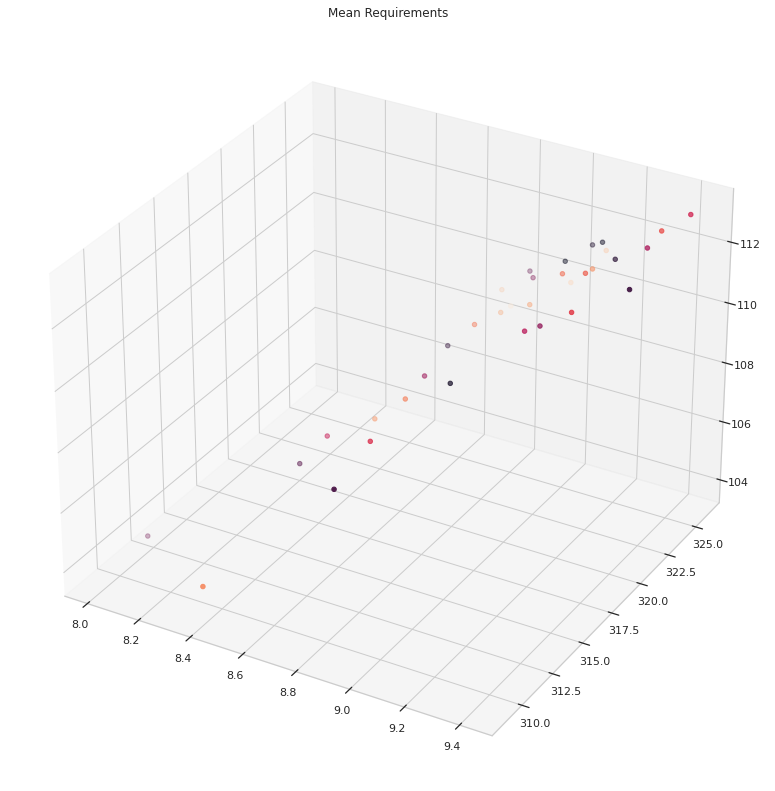

In [28]:
lu=[x for x in range(34)]
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(alpha['GPA'],alpha['GRE'],alpha['TOEFL'], c = lu)
plt.title("Mean Requirements")
# show plot
plt.show()

**KMeans**

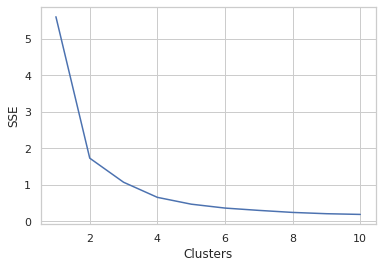

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
#elbow method
Z=req[['GPA','GRE','TOEFL']]
#Scaling data for better performance
min_max_scaler = MinMaxScaler()
Z_scale=min_max_scaler.fit_transform(Z)
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
    k_means.fit(Z_scale)
    wcss.append(k_means.inertia_)
#plot elbow curve
plt.plot(np.arange(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [30]:
km=KMeans(n_clusters=6,random_state=101)
tier=km.fit_predict(Z_scale)

In [31]:
km.cluster_centers_

array([[0.9596768 , 0.91128266, 0.93068398],
       [0.41467298, 0.38172401, 0.34167729],
       [0.65354382, 0.79127358, 0.68573243],
       [0.13373466, 0.08781037, 0.02719349],
       [0.54008249, 0.59028192, 0.51700139],
       [0.7914561 , 0.88078611, 0.81474088]])

In [32]:
req['tier']=tier

In [33]:
#(req[req['tier']==4])
req['tier'].value_counts()

5    10
2     9
1     5
4     4
0     4
3     2
Name: tier, dtype: int64

In [34]:
req[req['tier']==1]

,University,GRE,GPA,TOEFL,tier
7,IUPUI,312.666667,8.700000,107.000000,1
8,Indiana University,315.103448,8.448276,106.275862,1
16,SUNY Buffalo,316.370370,8.492593,106.851852,1
18,UT Dallas,315.656250,8.692187,107.453125,1
27,University of Iowa,317.181818,8.636364,107.500000,1


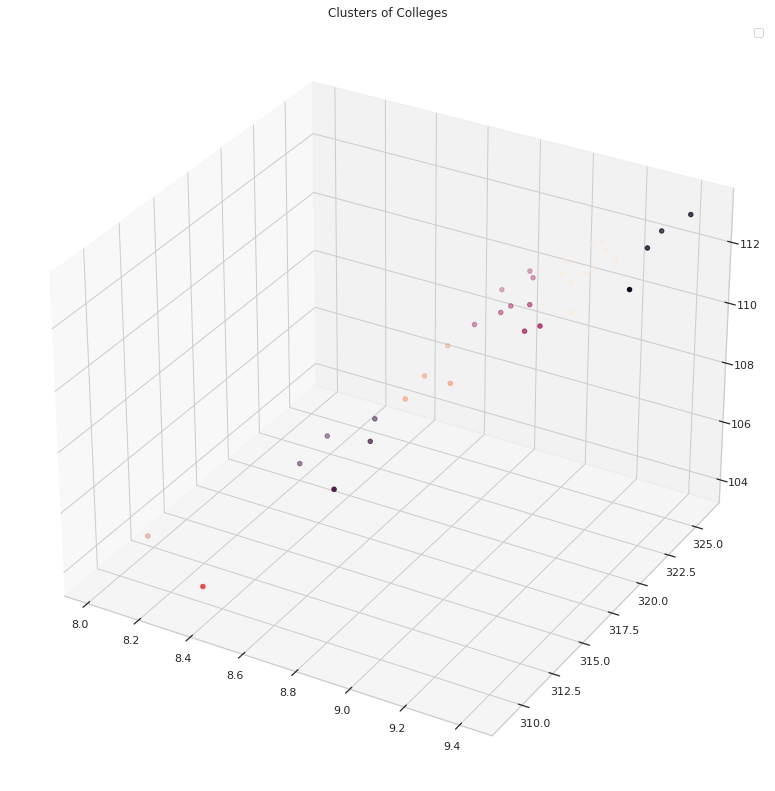

In [35]:
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
ax.scatter3D(req['GPA'],req['GRE'],req['TOEFL'], c= req.tier)
plt.title('Clusters of Colleges')
ax.legend()
plt.show()

In [36]:
td=req[['University','tier']]

In [37]:
#data.drop('tier',inplace=True,axis=1)

In [38]:
data.head()

,University,GRE,GPA,TOEFL
0,"University of California, San Diego (UCSD)",334,8.9,113
1,"University of California, San Diego (UCSD)",336,8.8,113
2,"University of California, San Diego (UCSD)",329,9.4,114
3,"University of California, San Diego (UCSD)",317,9.7,112
4,"University of California, San Diego (UCSD)",334,9.7,116


In [39]:
final=data.merge(td,on='University')

In [40]:
final.describe()

,GRE,GPA,TOEFL,tier
count,2493.000000,2493.000000,2493.00000,2493.000000
mean,323.052948,9.063658,110.89290,3.543121
std,7.651021,0.694523,3.80991,1.931472
min,284.000000,7.100000,97.00000,0.000000
25%,318.000000,8.500000,108.00000,2.000000
50%,323.000000,9.100000,111.00000,5.000000
75%,329.000000,9.700000,114.00000,5.000000
max,340.000000,10.000000,119.00000,5.000000


In [41]:
final.groupby('University').mean()

,GRE,GPA,TOEFL,tier
University,,,,
Brown University,324.428571,9.021429,111.142857,5.0
Carnegie Mellon University,325.285223,9.122337,111.718213,5.0
Colorado state university,318.423077,8.863462,108.807692,4.0
Columbia University,325.227642,9.087805,111.569106,5.0
Cornell University,324.041667,9.222222,111.805556,5.0
Duke University,320.629630,8.751852,109.000000,4.0
Harvard University,322.045455,9.359091,111.818182,0.0
IUPUI,312.666667,8.700000,107.000000,1.0
Indiana University,315.103448,8.448276,106.275862,1.0


**KNN**

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X=final.drop(['University','tier'],axis=1)
y=final.tier
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.3,random_state = 101)

Text(0, 0.5, 'Error Rate')

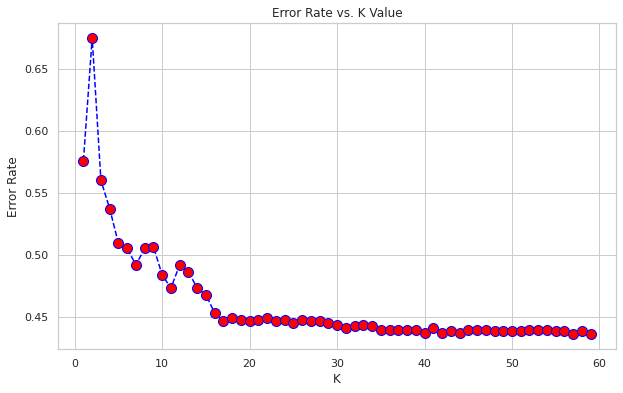

In [43]:
# Elbow method
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Error rate decreases as k value increases and becomes constant after a certain k value

In [44]:
knn = KNeighborsClassifier(n_neighbors = 58)
knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred = knn.predict(X_test)

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   0   0   0 110]
 [  0   0   0   0   0  43]
 [  0   0   0   0   0 117]
 [  0   0   0   0   0   6]
 [  0   0   0   0   0  52]
 [  0   0   0   0   0 420]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        52
           5       0.56      1.00      0.72       420

    accuracy                           0.56       748
   macro avg       0.09      0.17      0.12       748
weighted avg       0.32      0.56      0.40       748



In [46]:
#predict for custom input
ti=[[100,315,9.5]]#gre gpa toefl
ts=scaler.transform(ti)
p=knn.predict(ts)[0]
print(req[req['tier']==p].University)

0                                 Brown University
1                       Carnegie Mellon University
3                              Columbia University
4                               Cornell University
19                        University Of Washington
21    University of California, Los Angeles (UCLA)
22      University of California, San Diego (UCSD)
26      University of Illinois at Urbana-Champaign
31                   University of Texas at Austin
32                 University of Wisconsin-Madison
Name: University, dtype: object


In [47]:
req[req.tier==p]

,University,GRE,GPA,TOEFL,tier
0,Brown University,324.428571,9.021429,111.142857,5
1,Carnegie Mellon University,325.285223,9.122337,111.718213,5
3,Columbia University,325.227642,9.087805,111.569106,5
4,Cornell University,324.041667,9.222222,111.805556,5
19,University Of Washington,321.384000,9.178400,110.872000,5
21,"University of California, Los Angeles (UCLA)",323.490741,9.137037,111.333333,5
22,"University of California, San Diego (UCSD)",323.759434,9.040566,111.000000,5
26,University of Illinois at Urbana-Champaign,323.717949,9.153205,111.435897,5
31,University of Texas at Austin,324.760563,9.158451,111.704225,5
32,University of Wisconsin-Madison,323.112426,9.100000,111.071006,5


**Decision Tree**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X=final[['GRE', 'GPA', 'TOEFL']]
y1=data['University']
#y = le.fit_transform(y1)
y= final['tier']
#rf = RandomForestClassifier(max_depth=50, random_state=101)
dt = RandomForestClassifier(max_depth=50, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 101)
dt.fit(X_train, y_train)
predictions=dt.predict(X_test)
print(dt.score(X_test,y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.5120320855614974
[[  5   1   3   0   0 101]
 [  0   2   7   0   7  27]
 [  1   6   8   0   2 100]
 [  1   0   3   1   0   1]
 [  6   3   7   0   5  31]
 [ 20   8  24   0   6 362]]
              precision    recall  f1-score   support

           0       0.15      0.05      0.07       110
           1       0.10      0.05      0.06        43
           2       0.15      0.07      0.09       117
           3       1.00      0.17      0.29         6
           4       0.25      0.10      0.14        52
           5       0.58      0.86      0.69       420

    accuracy                           0.51       748
   macro avg       0.37      0.21      0.22       748
weighted avg       0.40      0.51      0.43       748

